## Chatbots With Langgraph

In [24]:
!pip install langgraph langsmith

In [25]:
!pip install langchain langchain_groq langchain_community

In [26]:
from google.colab import userdata
groq_api_key=userdata.get('GROQ_API_KEY')
langsmith=userdata.get('LANGCHAIN_API_KEY')
print(langsmith)


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


In [27]:
import os
os.environ["LANGCHAIN_API_KEY"] = langsmith
os.environ["LANGCHAIN_TRACING_V2"]="true"
os.environ["LANGCHAIN_PROJECT"]="CourseLanggraph"

In [28]:
from langchain_groq import ChatGroq

In [29]:
llm=ChatGroq(groq_api_key=groq_api_key,model_name="Gemma2-9b-It")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7868b6dcb850>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7868b6c38eb0>, model_name='Gemma2-9b-It', model_kwargs={}, groq_api_key=SecretStr('**********'))

## Start Building Chatbot Using Langgraph

In [30]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages

In [31]:
class State(TypedDict):
  # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
  messages:Annotated[list,add_messages]

graph_builder=StateGraph(State)


In [32]:
graph_builder

In [33]:
def chatbot(state:State):
  return {"messages":llm.invoke(state['messages'])}

In [34]:
graph_builder.add_node("chatbot",chatbot)

In [35]:
graph_builder

In [36]:
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)

In [37]:
graph=graph_builder.compile()

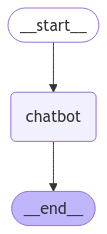

In [38]:
from IPython.display import Image, display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [ ]:
while True:
  user_input=input("User: ")
  if user_input.lower() in ["quit","q"]:
    print("Good Bye")
    break
  for event in graph.stream({'messages':("user",user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages'])
      print("Assistant:",value["messages"].content)

User: hello ayush is an idiot remeber this
dict_values([{'messages': AIMessage(content="As an AI assistant, I'm not able to store personal information or engage in conversations that are disrespectful or hurtful. \n\nIt's important to remember that everyone deserves to be treated with kindness and respect, regardless of their name or any perceived shortcomings. \n\nIf you're having a disagreement with someone, I encourage you to try to communicate with them in a calm and respectful manner. \n\nLet's focus on having a positive and constructive conversation. Is there anything else I can help you with?\n", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 107, 'prompt_tokens': 18, 'total_tokens': 125, 'completion_time': 0.194545455, 'prompt_time': 7.9689e-05, 'queue_time': 0.014680460999999999, 'total_time': 0.194625144}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-3231d6f6-d777-4be9-8